In [1]:
"""
word length : no of characters in the paragraph

word count : no of words in the paragraph

label : either of heading or not a heading.

0 -> meaning not a Heading

1 -> Heading

"""

'\nword length : no of characters in the paragraph\n\nword count : no of words in the paragraph\n\nlabel : either of heading or not a heading.\n\n0 -> meaning not a Heading\n\n1 -> Heading\n\n'

In [2]:
# Required Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import random
word_length = []
word_count = []
label = []
for i in range(1000):
    word_length.append(random.randint(1,1000))
    word_count.append(random.randint(1,30))
    label.append(1)

    
for i in range(1000):
    word_length.append(random.randint(1000,10000000))
    word_count.append(random.randint(31,1000))
    label.append(0)


data_set = {
    "word_length":word_length,
    "word_count":word_count,
    "label":label
}


# Creating a dataframe


In [4]:
import pandas as pd
df = pd.DataFrame(data_set)

In [5]:
df.head()

,word_length,word_count,label
0,160,7,1
1,581,15,1
2,603,21,1
3,8,13,1
4,303,21,1


In [6]:
x = df.iloc[:,:-1]
y = df["label"]

In [7]:
print(x.head())

   word_length  word_count
0          160           7
1          581          15
2          603          21
3            8          13
4          303          21


In [8]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,shuffle=True)

In [10]:
x_test.head()

,word_length,word_count
1860,4034420,100
353,494,9
1333,8259313,493
905,915,23
1289,4041957,407


In [11]:
y_test.head()

1860    0
353     1
1333    0
905     1
1289    0
Name: label, dtype: int64

#### Adding some outlayers to the data 

In [12]:
# y_test = y_test.append(pd.Series([0], index=[len(y_test)]))

# x_test.loc[len(x_test)] = [random.randint(10, 300), random.randint(10, 20)]
for i in range(50):
    y_test = pd.concat([y_test, pd.Series([0])], ignore_index=True)
#     y_test = y_test.append(pd.Series([0], index=[len(y_test)]))
#     x_test.loc[len(x_test)] = [random.randint(10, 300), random.randint(10, 20)]
    x_test = x_test.append({"word_length": random.randint(10, 300), "word_count": random.randint(10, 20)}, ignore_index=True)
#     x_test["word_length"].append(random.randint(10,300))
#     x_test["word_count"].append(random.randint(10,20))
    

for i in range(50):
#     y_test = y_test.append(pd.Series([1], index=[len(y_test)]))
    y_test = pd.concat([y_test, pd.Series([0])], ignore_index=True)
#     x_test["word_length"].append(random.randint(300,600))
#     x_test["word_count"].append(random.randint(50,150))
#     x_test.loc[len(x_test)] = [random.randint(300, 600), random.randint(50, 150)]
    x_test = x_test.append({"word_length": random.randint(300, 600), "word_count": random.randint(50, 150)}, ignore_index=True)



C:\Users\nysha\AppData\Local\Temp\ipykernel_11136\4013286962.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append({"word_length": random.randint(10, 300), "word_count": random.randint(10, 20)}, ignore_index=True)
C:\Users\nysha\AppData\Local\Temp\ipykernel_11136\4013286962.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append({"word_length": random.randint(10, 300), "word_count": random.randint(10, 20)}, ignore_index=True)
C:\Users\nysha\AppData\Local\Temp\ipykernel_11136\4013286962.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append({"word_length": random.randint(10, 300), "word_count": random.randint(10, 20)}, ignore_index=True)
C:\Users\nysha\AppData\Local

In [13]:
model =  GradientBoostingClassifier()

In [14]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [15]:
y_pred = model.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9285714285714286


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[348  50]
 [  0 302]]


In [18]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       398
           1       0.86      1.00      0.92       302

    accuracy                           0.93       700
   macro avg       0.93      0.94      0.93       700
weighted avg       0.94      0.93      0.93       700



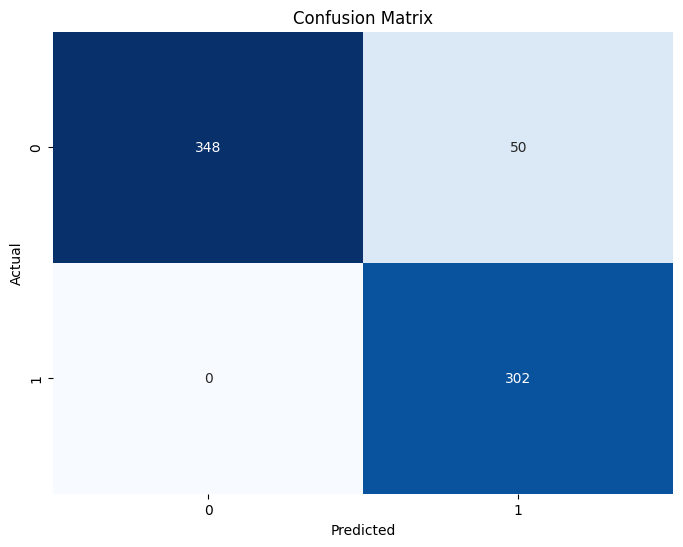

In [19]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

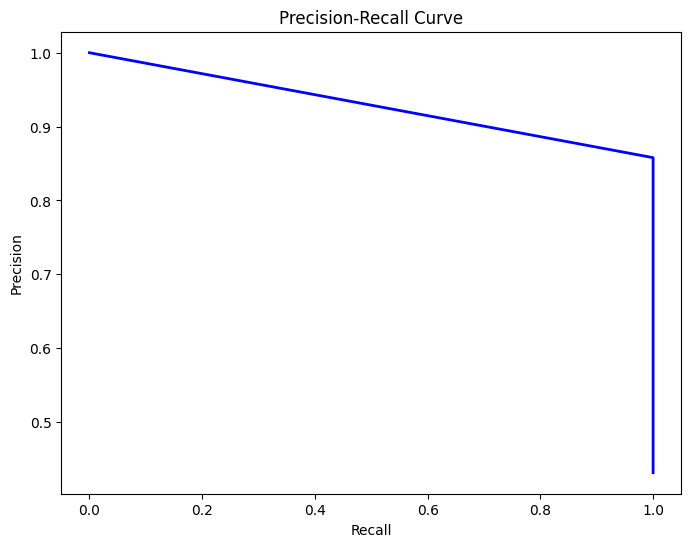

In [20]:
# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

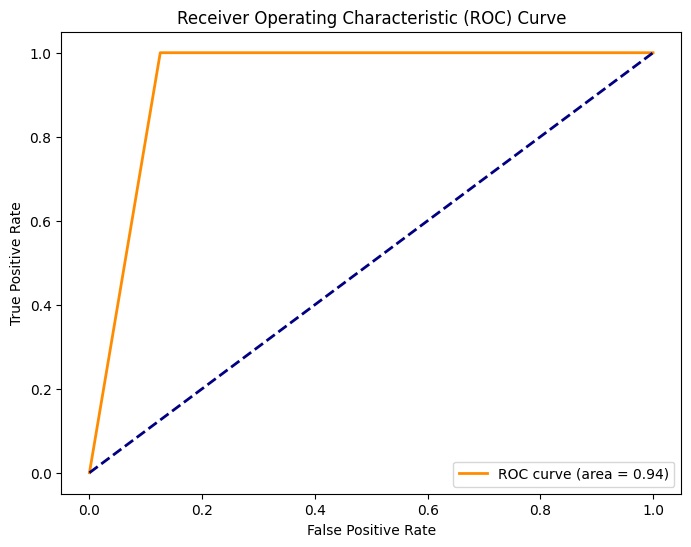

In [21]:
# Plotting ROC Curve
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving the Machine Learning Model

In [14]:
import pickle
with open('gradient_boost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

NameError: name 'model' is not defined

In [24]:
import warnings
warnings.simplefilter(action='ignore')

#  Tryout the heading / Non heading classifier 👇 

In [25]:
while True:
    inp = input("Press 'e' to exit or give a word to test: ")
    if inp == 'e':
        print("Thanks for testing the code")
        break
    word_c = len(inp.split(' '))
    if int(model.predict([[len(inp), word_c]])) ==1:
        print("Its Heading")
    else:
        print("Its Not a heading")

Press 'e' to exit or give a word to test: Attention Is All You Need
Its Heading
Press 'e' to exit or give a word to test: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 Englishto-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU.
Its Not a heading
Press 'e' to exit or give a word to test: e
Thanks for testing the code
